### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

### Training DataSet

In [2]:
df = pd.read_csv('../input/energyforecasting/train_IxoE5JN.csv', index_col='row_id')

### EDA

In [3]:
df.head()

,datetime,energy
row_id,,
1,2008-03-01 00:00:00,1259.985563
2,2008-03-01 01:00:00,1095.541500
3,2008-03-01 02:00:00,1056.247500
4,2008-03-01 03:00:00,1034.742000
5,2008-03-01 04:00:00,1026.334500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94992 entries, 1 to 94992
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  94992 non-null  object 
 1   energy    93092 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.isna().sum()

In [ ]:
df[df['energy'].isna()]

### Interpolating Missing values

In [5]:
df['energy'] = df['energy'].fillna(df['energy'].interpolate(option='spline'))

In [6]:
df = df.set_index('datetime')

In [9]:
df.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


### Visualization

<Figure size 1200x1200 with 0 Axes>

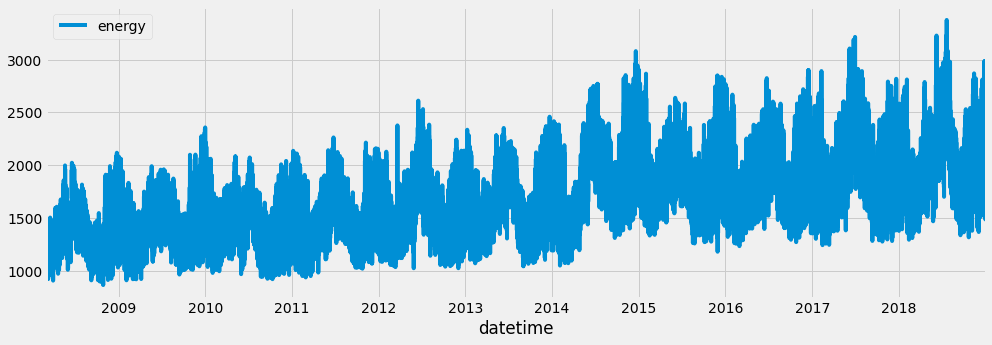

In [7]:
plt.figure(figsize=(8, 8), dpi=150);
df.plot();

In [8]:
### Obtaining Year,Month,hour 
df['Year']         = pd.DatetimeIndex(df.index).year
df['Month']        = pd.DatetimeIndex(df.index).month
df['hour'] = pd.DatetimeIndex(df.index).hour
df["quarter"]= pd.DatetimeIndex(df.index).quarter
df["dayofweek"]= pd.DatetimeIndex(df.index).dayofweek
df["dayofyear"]= pd.DatetimeIndex(df.index).dayofyear
df["dayofmonth"]= pd.DatetimeIndex(df.index).day
df["weekofyear"]= df.index.isocalendar().week

In [10]:
df.head()

,energy,Year,Month,hour,quarter,dayofweek,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2008-03-01 00:00:00,1259.985563,2008,3,0,1,5,61,1,9
2008-03-01 01:00:00,1095.541500,2008,3,1,1,5,61,1,9
2008-03-01 02:00:00,1056.247500,2008,3,2,1,5,61,1,9
2008-03-01 03:00:00,1034.742000,2008,3,3,1,5,61,1,9
2008-03-01 04:00:00,1026.334500,2008,3,4,1,5,61,1,9


<AxesSubplot:xlabel='datetime'>

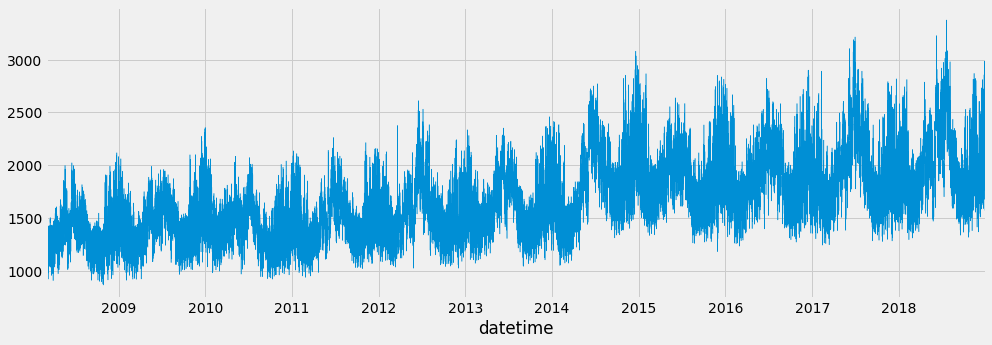

In [11]:
df['energy'].plot(linewidth=0.5)

In [ ]:
# daily energy forecast
data_columns = ['energy']

# Resample to weekly frequency, aggregating with mean
df = df[data_columns].resample('D').sum()
df.head(3)

In [ ]:
cols_plot = ['energy']

df.loc['2009'][cols_plot].plot(linewidth=0.5);
df.loc['2010'][cols_plot].plot(linewidth=0.5);
df.loc['2011'][cols_plot].plot(linewidth=0.5);
df.loc['2012'][cols_plot].plot(linewidth=0.5);
df.loc['2013'][cols_plot].plot(linewidth=0.5);
df.loc['2014'][cols_plot].plot(linewidth=0.5);
df.loc['2015'][cols_plot].plot(linewidth=0.5);
df.loc['2016'][cols_plot].plot(linewidth=0.5);
df.loc['2017'][cols_plot].plot(linewidth=0.5);
df.loc['2018'][cols_plot].plot(linewidth=0.5);

observation
From the visualization there is seasonality 






In [ ]:
# define a function to check trend and plot

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df, 
             marker='.', 
             linestyle='-', 
             linewidth=0.5,
             color='blue',  
             label='Original')
    
    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o', 
             markersize=8, 
             linestyle='-', 
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()

In [ ]:
cols_plot = ['energy']

detect_trend(df.loc['2009']['energy'].values)
detect_trend(df.loc['2010']['energy'].values)
detect_trend(df.loc['2011']['energy'].values)
detect_trend(df.loc['2012']['energy'].values)
detect_trend(df.loc['2013']['energy'].values)
detect_trend(df.loc['2014']['energy'].values)
detect_trend(df.loc['2015']['energy'].values)
detect_trend(df.loc['2016']['energy'].values)
detect_trend(df.loc['2017']['energy'].values)
detect_trend(df.loc['2018']['energy'].values)

detect_trend(df[cols_plot].values)

Observation - There is slight upward trend in the year 2018,2013 and downward trend in the year 2010

#### Stationarity test Augmented Dickey-Fuller test - (ADF) test 

In [ ]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

for year in years:
    X = df.loc[year]['energy'].values

    result = adfuller(X)
    
    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = df['energy'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))  

#### conclusion

1. Consolidated years - p-value is less than .05 or .01. hence H0 CAN be rejected. 
3. H0 : Not stationary
2. Means TS is stationary
4. Yearly- p-value method : p-value is less than 0.05 so we reject the null hypothesis for yearly TS

In [ ]:
def test_stationarity(timeseries, reduced_timeseries=None, smoothing_type='R'):
     
    # Plot rolling statistics:
    orig = plt.plot(timeseries,
                    marker='.', 
                    linestyle='-', 
                    linewidth=0.5,
                    color='blue',  
                    label='Original')
    
    mean = plt.plot(reduced_timeseries, 
                    marker='.', 
                    linestyle='-', 
                    linewidth=0.5,
                    color='red',   
                    label='Reduced')
    
    if smoothing_type == 'R':
        title = 'Smoothing by Rolling MA'
    elif smoothing_type == 'E':
        title = 'Smoothing by Exponential weighted MA'
    else:
        title = 'Default MA'
        
    plt.legend(loc='best')
    plt.title(title)
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(reduced_timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)

In [ ]:
ts = df['energy']

In [ ]:
moving_avg = ts.rolling(window=4).mean()

In [ ]:
moving_avg.head(50)

In [ ]:
plt.plot(ts, marker='.', linestyle='-', linewidth=0.5, label='Energy Demand', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean - 4 months');

plt.legend(loc='best')
plt.title('Energy demand & Rolling Mean');

In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.head(50)

In [ ]:
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts, ts_moving_avg_diff, 'R')

#### observation

- The rolling values appear to be varying slightly but there is no specific trend. 
- Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series

#### conclusion

1. p-value method : p-value of 2.227654e-25 is lesser than 0.05 so we REJECT the null hypothesis. The null hypothesis is : the TS is NON-STATTIONARY. Hence it is proved that TS is stationary
    
2. Critical value  : our statistic value of -1.356965e+01 is more than the value of -3.432018e+00 at 1%. So this falls in the rejection region. Hence we REJECT the null hypothesis. i.e TS is stationary


In [ ]:
ewma = pd.Series.ewm

In [ ]:
fwd_exp_weighted_avg = ewma(ts, span=24).mean() 

plt.plot(ts, marker='.', linestyle='-', linewidth=0.5,)
plt.plot(fwd_exp_weighted_avg, marker='.', linestyle='-', linewidth=0.5, color='red');

In [ ]:
ts_ewma_diff = ts - fwd_exp_weighted_avg
test_stationarity(ts, ts_ewma_diff, 'E')

### Decomposition

In [ ]:
# Additive Decomposition 

rcParams['figure.figsize'] = 18, 12

result_additive = seasonal_decompose(df['energy'],
                                     model='additive')

fig = result_additive.plot()

# Time series forecasting with ARIMA

### ACF&PACF plots

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(ts)
plt.title('Original Series')
acf0 = plot_acf(ts)
acf1 = plot_pacf(ts)

In [ ]:
plt.plot(ts.diff()); 
plt.title('1st Order Differencing')
acf0 = plot_acf(ts.diff().dropna())
acf1 = plot_pacf(ts.diff().dropna())

In [ ]:
plt.plot(ts.diff().diff()); 
plt.title('2nd Order Differencing')
acf0 = plot_acf(ts.diff().diff().dropna())
acf1 = plot_pacf(ts.diff().diff().dropna())

In [ ]:
p = q = range(0, 3)
d = [0, 1]

In [ ]:
import itertools
pdq = list(itertools.product(p, d, q))

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
seasonal_pdq

In [ ]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

### Machine Learning

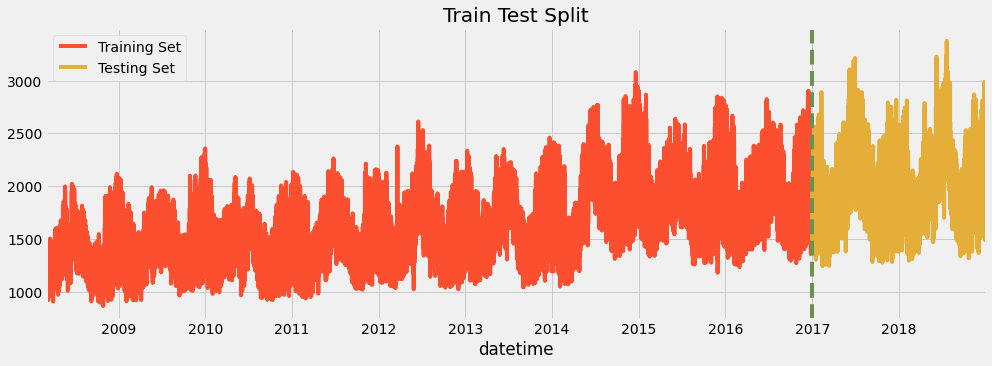

In [12]:
color_pallet = sns.color_palette()
train = df.loc[df.index < '01-01-2017']
test = df.loc[df.index>='01-01-2017']


ay =train.plot(y="energy",style='-',figsize=(15,5),title="Train Test Split",color=color_pallet[1])
test.plot(y="energy",ax=ay,style='-',color=color_pallet[2])
plt.legend(["Training Set",'Testing Set'])
plt.axvline('01-01-2017',color=color_pallet[3],ls="--")


In [13]:
y_train = train.energy
X_train = train.drop(["energy"],axis=1)
y_test = test.energy
X_test = test.drop(["energy"],axis=1)

In [14]:
X_train.head()

,Year,Month,hour,quarter,dayofweek,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,
2008-03-01 00:00:00,2008,3,0,1,5,61,1,9
2008-03-01 01:00:00,2008,3,1,1,5,61,1,9
2008-03-01 02:00:00,2008,3,2,1,5,61,1,9
2008-03-01 03:00:00,2008,3,3,1,5,61,1,9
2008-03-01 04:00:00,2008,3,4,1,5,61,1,9


In [15]:
X_train["weekofyear"]=X_train["weekofyear"].astype("int64")
X_test["weekofyear"]=X_test["weekofyear"].astype("int64")

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77472 entries, 2008-03-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        77472 non-null  int64
 1   Month       77472 non-null  int64
 2   hour        77472 non-null  int64
 3   quarter     77472 non-null  int64
 4   dayofweek   77472 non-null  int64
 5   dayofyear   77472 non-null  int64
 6   dayofmonth  77472 non-null  int64
 7   weekofyear  77472 non-null  int64
dtypes: int64(8)
memory usage: 5.3 MB


In [17]:
import xgboost as xgb
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1200,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[15:44:39] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1652.73961	validation_1-rmse:2015.53182
[100]	validation_0-rmse:640.31251	validation_1-rmse:856.44230
[200]	validation_0-rmse:299.54884	validation_1-rmse:461.46513
[300]	validation_0-rmse:200.22844	validation_1-rmse:333.57399
[400]	validation_0-rmse:171.71214	validation_1-rmse:286.43312
[500]	validation_0-rmse:159.84749	validation_1-rmse:265.98689
[600]	validation_0-rmse:153.08528	validation_1-rmse:255.67274
[700]	validation_0-rmse:148.69921	validation_1-rmse:249.64468
[800]	validation_0-rmse:145.37411	validation_1-rmse:245.02310
[900]	validation_0-rmse:142.55966	validation_1-rmse:241.31005
[1000]	validation_0-rmse:140.51312	validation_1-rmse:238.99311
[1100]	validation_0-rmse:138.79083	validation_1-rmse:237.00841
[1199]	validation_0-rmse:137.27491	validation_1-rmse:235.60980


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1200,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

<AxesSubplot:title={'center':'Feature_Importance'}>

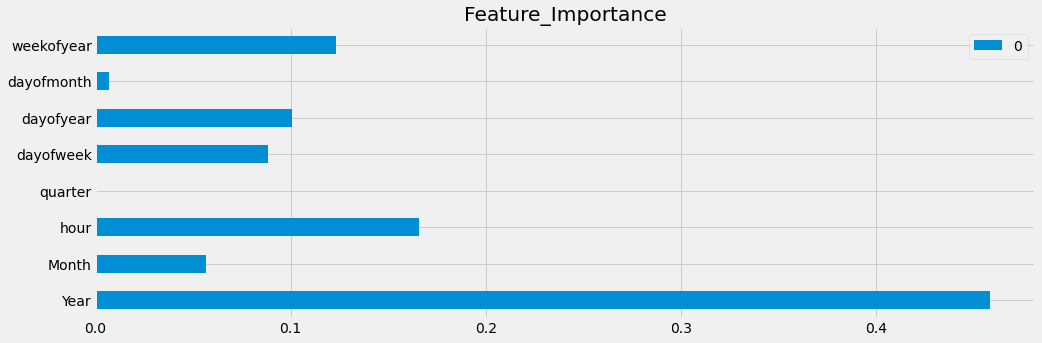

In [18]:
feature_importance = model.feature_importances_
feature_importance_names = model.feature_names_in_

F_Importance = pd.DataFrame(feature_importance,index=feature_importance_names)
F_Importance.rename(columns={0:"Value"})
F_Importance.plot(kind='barh',title="Feature_Importance")

#### prediction

In [19]:
test

,energy,Year,Month,hour,quarter,dayofweek,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2017-01-01 00:00:00,1740.5604,2017,1,0,1,6,1,1,52
2017-01-01 01:00:00,1618.2288,2017,1,1,1,6,1,1,52
2017-01-01 02:00:00,1534.7286,2017,1,2,1,6,1,1,52
2017-01-01 03:00:00,1480.2885,2017,1,3,1,6,1,1,52
2017-01-01 04:00:00,1452.6243,2017,1,4,1,6,1,1,52
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2528.4468,2018,12,19,4,0,365,31,1
2018-12-31 20:00:00,2461.8836,2018,12,20,4,0,365,31,1
2018-12-31 21:00:00,2365.9944,2018,12,21,4,0,365,31,1


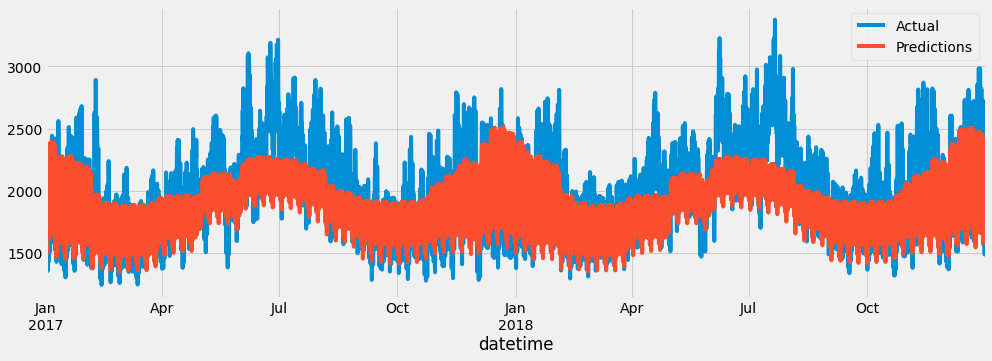

In [20]:
test["Predictons"] = model.predict(X_test)

test.loc[:,["energy","Predictons"]].plot(figsize=(15,5))

plt.legend(["Actual",'Predictions'])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
score = mean_absolute_error(test["energy"],test['Predictons'])

print("Mean Absololute error:" ,score)

Mean Absololute error: 167.40779706351967


<AxesSubplot:xlabel='date'>

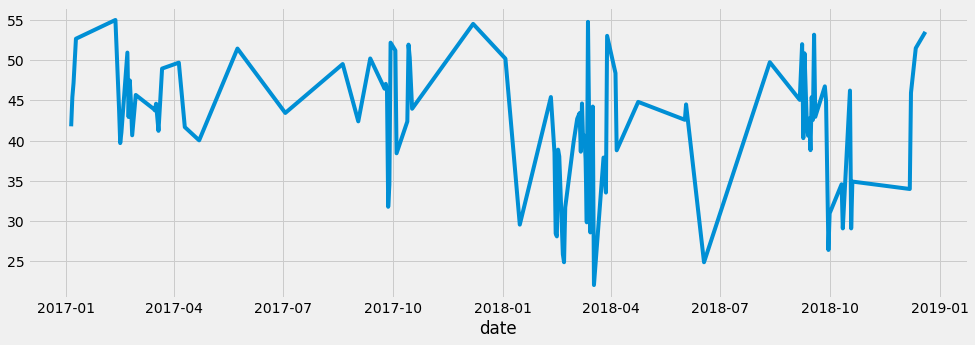

In [22]:
test["error"]= abs(test["energy"]- test['Predictons'])
test['date'] = test.index.date
error =test.groupby(["date"]).error.mean().sort_values(ascending=True)
error[:100].plot()

In [23]:
score = np.sqrt(mean_squared_error(test["energy"],test['Predictons']))

print("Root Mean squared error:" ,score)

Root Mean squared error: 235.60903684614738


In [34]:
df_test = pd.read_csv('../input/test-01/test.csv', index_col='row_id')

In [35]:
df_test.head()

,datetime
row_id,
94993,2019-01-01 00:00:00
94994,2019-01-01 01:00:00
94995,2019-01-01 02:00:00
94996,2019-01-01 03:00:00
94997,2019-01-01 04:00:00


In [36]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test = df_test.set_index('datetime')
### Obtaining Year,Month,hour 
df_test['Year']         = pd.DatetimeIndex(df_test.index).year
df_test['Month']        = pd.DatetimeIndex(df_test.index).month
df_test['hour'] = pd.DatetimeIndex(df_test.index).hour
df_test["quarter"]= pd.DatetimeIndex(df_test.index).quarter
df_test["dayofweek"]= pd.DatetimeIndex(df_test.index).dayofweek
df_test["dayofyear"]= pd.DatetimeIndex(df_test.index).dayofyear
df_test["dayofmonth"]= pd.DatetimeIndex(df_test.index).day
df_test["weekofyear"]= df_test.index.isocalendar().week

In [37]:
df_test.head()

,Year,Month,hour,quarter,dayofweek,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,
2019-01-01 00:00:00,2019,1,0,1,1,1,1,1
2019-01-01 01:00:00,2019,1,1,1,1,1,1,1
2019-01-01 02:00:00,2019,1,2,1,1,1,1,1
2019-01-01 03:00:00,2019,1,3,1,1,1,1,1
2019-01-01 04:00:00,2019,1,4,1,1,1,1,1


In [39]:
df_test["weekofyear"]=df_test["weekofyear"].astype("int64")

<AxesSubplot:xlabel='datetime'>

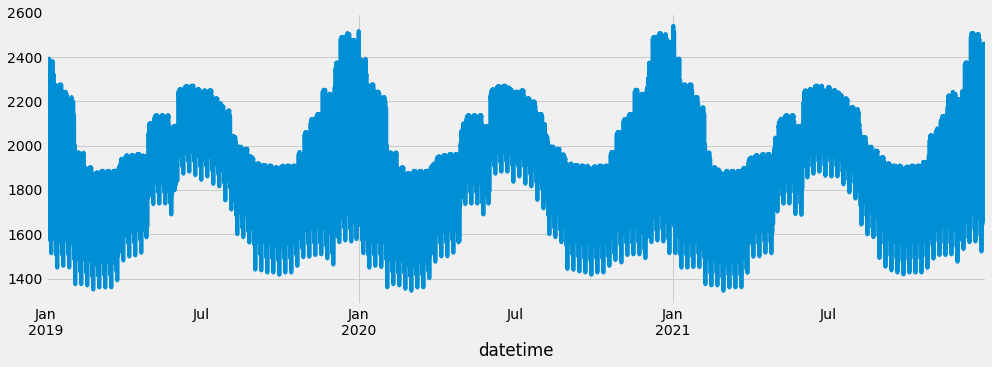

In [40]:
df_test["Predictons"] = model.predict(df_test)
df_test["Predictons"].plot()

In [46]:
df_final = pd.read_csv('../input/test-01/test.csv')

In [47]:
df_final.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [50]:
df_final['energy'] = model.predict(df_test.drop('Predictons', axis=1))

In [51]:
df_final.head()

,row_id,datetime,energy
0,94993,2019-01-01 00:00:00,1823.944946
1,94994,2019-01-01 01:00:00,1749.599487
2,94995,2019-01-01 02:00:00,1680.893921
3,94996,2019-01-01 03:00:00,1633.756226
4,94997,2019-01-01 04:00:00,1613.611206


In [54]:
df_final.drop('datetime', axis=1).to_csv('submission.csv', index = False)

### Deep Learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = df['energy']

In [ ]:
data.head()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
len(data)

In [ ]:
len(data)- 5000

In [ ]:
test_size = 5000

In [ ]:
test_ind = len(data)- test_size

In [ ]:
train = pd.DataFrame(data.iloc[:test_ind])
test = pd.DataFrame(data.iloc[test_ind:])

In [ ]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train

In [ ]:
# Let's redefine to get 24 hours back and then predict the next hour out
length = 24
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
# We're only using one feature in our time series
n_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', steps_per_execution=16)

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [ ]:
# fit model
model.fit_generator(generator,epochs=3,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
model.save("final_model.h5")

In [ ]:
import joblib
joblib.dump(scaler,'iris_scaler.pkl')

##### Evaluate on Test Data

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

### Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(12,8))